# Vaccine Distribution - Using Capacitated Vehicle Routing Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('List Of Cities.csv')
data.columns

Index(['city', 'population', 'lat', 'long'], dtype='object')

In [4]:
n = 10  # Cities to be served
xc = data['lat'].to_numpy()
yc = data['long'].to_numpy()

Text(0, 0.5, 'Longitute')

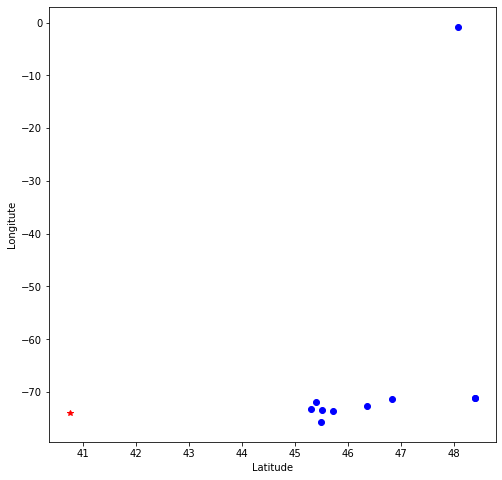

In [5]:
plt.figure(figsize = (8,8))
plt.plot(xc[0], yc[0], c='r', marker='*')
plt.scatter(xc[1:], yc[1:], c='b')
plt.xlabel('Latitude')
plt.ylabel('Longitute')

In [6]:
data['vac_req'] = data['population']*.05
vac_req = round(data['vac_req'],0).to_list()
data['vac_req'] = vac_req

In [7]:
data

,city,population,lat,long,vac_req
0,Montreal,1704694.0,40.741895,-73.989308,85235.0
1,Quebec,531902.0,46.825960,-71.235223,26595.0
2,Laval,422993.0,48.071038,-0.772350,21150.0
3,Gatineau,276245.0,45.484121,-75.681373,13812.0
4,Longueuil,239700.0,45.517238,-73.446747,11985.0
5,Sherbrooke,161323.0,45.403271,-71.889038,8066.0
6,Saguenay,145949.0,48.405959,-71.069183,7297.0
7,Levis,143414.0,48.405959,-71.069183,7171.0
8,Trois-Rivieres,134413.0,46.350800,-72.557126,6721.0
9,Terrebonne,111575.0,45.708101,-73.651516,5579.0


In [8]:
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}
Q = 50000
q = {i: vac_req[i] for i in N}

In [9]:
from gurobipy import Model, GRB, quicksum

In [10]:
mdl = Model('CVRP')

Using license file C:\Users\DELL\gurobi.lic
Academic license - for non-commercial use only - expires 2021-08-01


In [11]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [13]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))

In [14]:
mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j])
               for i, j in A if i != 0 and j != 0)
mdl.addConstrs(u[i] >= q[i] for i in N)
mdl.addConstrs(u[i] <= Q for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>}

In [15]:
mdl.Params.MIPGap = 0.1
mdl.Params.TimeLimit = 30  # seconds
mdl.optimize()

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 30.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0x84672dc1
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-01, 7e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+04]
Presolve added 70 rows and 70 columns
Presolve time: 0.02s
Presolved: 110 rows, 190 columns, 409 nonzeros
Presolved model has 90 SOS constraint(s)
Variable types: 100 continuous, 90 integer (90 binary)
Found heuristic solution: objective 254.0148346

Root relaxation: objective 1.493827e+02, 19 iterations, 0.00 seconds

    Nodes    |    Curre

In [16]:
active_arcs = [a for a in A if x[a].x > 0.99]

In [17]:
active_arcs

[(0, 3),
 (0, 5),
 (0, 10),
 (1, 0),
 (2, 0),
 (3, 9),
 (4, 0),
 (5, 1),
 (6, 2),
 (7, 6),
 (8, 7),
 (9, 4),
 (10, 8)]

Text(0, 0.5, 'Longitute')

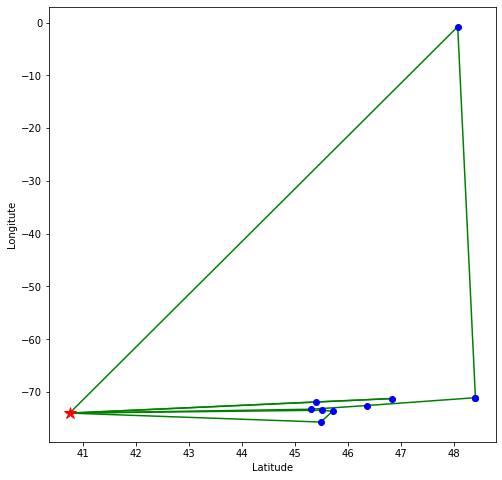

In [18]:
plt.figure(figsize = (8,8))
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='*', markersize = 12)
plt.scatter(xc[1:], yc[1:], c='b')
plt.xlabel('Latitude')
plt.ylabel('Longitute')

In [19]:
annotations = data['city']
annotations.to_list()
city = {i:data['city'][i] for i in range(11)}
route = [[(0, 3),(3, 9),(9, 4),(4, 0)],[(0, 5),(5, 1),(1, 0)],[(0, 10),(10, 8),(8, 7),(7, 6),(6, 2),(2, 0)]]

In [21]:
final = []
for i in route:
    l = []
    for j in i:
        l.append(city[j[0]])
    final.append(l)
separator = '-> '
i = 1
for numList in final:
    print('Route {}:'.format(i))
    print(separator.join(numList))
    i = i+1

Route 1:
Montreal-> Gatineau-> Terrebonne-> Longueuil
Route 2:
Montreal-> Sherbrooke-> Quebec
Route 3:
Montreal-> Saint-Jean-sur-Richelieu-> Trois-Rivieres-> Levis-> Saguenay-> Laval
